Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
from math import log, sqrt
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


e:\fer\su\venv\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['log', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
polynomialFeatures = PolynomialFeatures(degree=1)
phi = polynomialFeatures.fit_transform(X)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg
# Vaš kôd ovdje
transposed_phi = np.transpose(phi)
w = np.matmul(np.matmul(linalg.inv(np.matmul(transposed_phi, phi)), transposed_phi), y)
w2 = np.matmul(linalg.pinv(phi), y)
print("w koristeći formulu:      ", w)
print("w koristeći pseudoinverz: ", w2)

w koristeći formulu:       [2.2        0.45714286]
w koristeći pseudoinverz:  [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

E je: 4.085714285714286
fja srednje kvadratne pogreške:  2.042857142857143


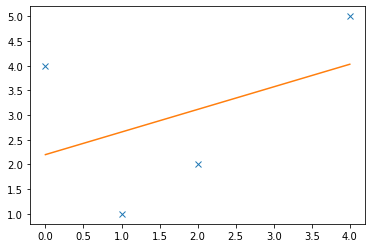

In [6]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
transposed_w = w.transpose()
h = np.empty(4)
E = 0
for i in range(0, h.size):
    h[i] = np.vdot(transposed_w, phi[i])
    E += (y[i] - h[i]) * (y[i] - h[i])
E = 0.5 * E
plt.plot(X, y, "x")
plt.plot(X, h)
print("E je:", E)
print("fja srednje kvadratne pogreške: ", mean_squared_error(y, h))

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje
#w = np.matmul(linalg.inv(phi), y)

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
linearRegression = LinearRegression().fit(X, y)
print("w = [" + str(linearRegression.intercept_) + " " + str(linearRegression.coef_[0]) + "]")
mean_squared_error(y, linearRegression.predict(X))

w = [2.2 0.45714285714285713]


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal

def function(x):
    return 5 + x - 2 * x * x - 5 * x * x * x

def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    generated_noise = normal(loc=0, scale=noise, size=len(X))
    result = np.empty(len(X))
    for i in range(0, len(X)):
        result[i] = f(X[i]) + generated_noise[i]
    return result

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
# Vaš kôd ovdje
X2 = make_instances(-5, 5, 50)
y2 = make_labels(X2, function, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

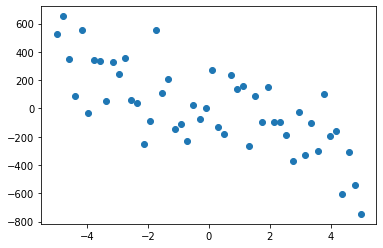

In [12]:
# Vaš kôd ovdje
plt.scatter(X2, y2)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

fja srednje kvadratne pogreške:  33767.19853366159


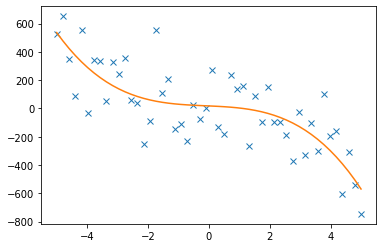

In [13]:
# Vaš kôd ovdje
polynomialFeatures2 = PolynomialFeatures(3)
phi2 = polynomialFeatures2.fit_transform(X2)
w3 = np.matmul(linalg.pinv(phi2), y2)
transposed_w3 = w3.transpose()
h2 = np.empty(len(X2))
for i in range(0, len(X2)):
    h2[i] = np.vdot(transposed_w3, phi2[i])
plt.plot(X2, y2, "x")
plt.plot(X2, h2)
print("fja srednje kvadratne pogreške: ", mean_squared_error(y2, h2))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

fja srednje kvadratne pogreške za d = 1: 40461.427571034634
fja srednje kvadratne pogreške za d = 3: 33767.19853366159
fja srednje kvadratne pogreške za d = 5: 33168.247965331335
fja srednje kvadratne pogreške za d = 10: 30444.076639114865
fja srednje kvadratne pogreške za d = 20: 23269.27527778558


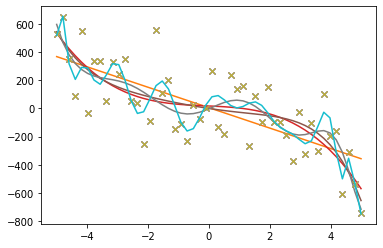

In [14]:
# Vaš kôd ovdje
def train(d, X, y):
    polynomialFeatures = PolynomialFeatures(d)
    phi = polynomialFeatures.fit_transform(X)
    w = np.matmul(linalg.pinv(phi), y)
    h = np.empty(len(X))
    for i in range(0, len(X)):
        h[i] = np.vdot(w.transpose(), phi[i])
    return h, w

d = np.array([1,3,5,10,20])
for i in d:
    h, w = train(i, X2, y2)
    plt.plot(X2, y2, "x")
    plt.plot(X2, h)
    print("fja srednje kvadratne pogreške za d = " + str(i) + ": " + str(mean_squared_error(y2, h)))

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

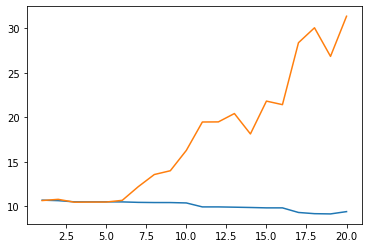

In [15]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

def predict(d, w, X):
    polynomialFeatures = PolynomialFeatures(d)
    phi = polynomialFeatures.fit_transform(X)
    h = np.empty(len(X))
    for i in range(0, len(X)):
        h[i] = np.vdot(w.transpose(), phi[i])
    return h

errors_train = []
errors_test = []
for i in range(1, 21):
    h, w = train(i, X_train, y_train)
    h_train = predict(i, w, X_train)
    h_test = predict(i, w, X_test)
    errors_train.append(log(mean_squared_error(y_train, h_train)))
    errors_test.append(log(mean_squared_error(y_test, h_test)))


plt.plot(range(1,21),errors_train)
plt.plot(range(1,21),errors_test)

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

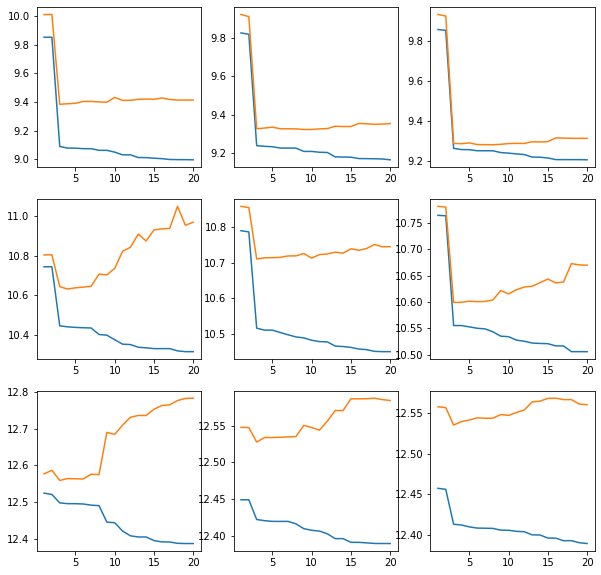

In [16]:
# Vaš kôd ovdje
X3 = make_instances(-5, 5, 1000)
noises = [100, 200, 500]
k = 0
plt.subplots(3,3,figsize=(10,10))
for noise in noises:
    y3 = make_labels(X3, function, noise)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.5)

    for N in [1/3, 2/3, 1]:
        err_tr = []
        err_te = []
        n = int(N * len(X_train3))
        for i in range(1, 21):
            h, w3 = train(i, X_train3[0:n], y_train3[0:n])
            h_train3 = predict(i, w3, X_train3[0:n])
            h_test3 = predict(i, w3, X_test3[0:n])
            err_tr.append(log(mean_squared_error(y_train3[0:n], h_train3)))
            err_te.append(log(mean_squared_error(y_test3[0:n], h_test3)))
        k += 1
        plt.subplot(3,3, k)
        plt.plot(range(1,21),err_tr)
        plt.plot(range(1,21),err_te)

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
# Vaš kôd ovdje
polynomialFeatures = PolynomialFeatures(3)
phi = polynomialFeatures.fit_transform(X)
for i in [0, 1, 10]:
    identity_matrix = np.identity(len(phi))
    identity_matrix[0][0] = 0
    w = np.matmul(np.matmul(linalg.inv(np.matmul(phi.transpose(), phi) + i * identity_matrix), phi.transpose()), y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for i in [0, 1, 10]:
    ridge = Ridge(alpha=i)
    ridge.fit(PolynomialFeatures(3, include_bias=False).fit_transform(X), y)
    print(ridge.intercept_, *ridge.coef_, sep=" ")

3.999999999999986 -5.916666666666665 3.375000000000014 -0.4583333333333368
3.0569614512471652 -0.6907936507936514 -0.283174603174602 0.1445804988662129
2.494441843122973 -0.1589729487341473 -0.13423066536848285 0.08156009919705863


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

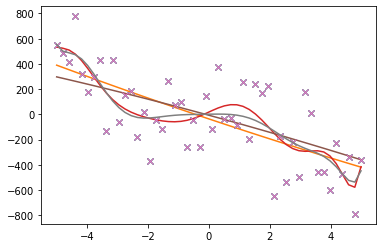

In [19]:
# Vaš kôd ovdje
X2 = make_instances(-5, 5, 50)
y2 = make_labels(X2, function, 200)

for lambd in [0, 100]:
    for d in [2, 10]:
        ridge = Ridge(alpha=lambd, fit_intercept=False)
        ridge.fit(PolynomialFeatures(d).fit_transform(X2), y2)
        h = ridge.predict(PolynomialFeatures(d).fit_transform(X2))
        plt.plot(X2, y2, "x")
        plt.plot(X2, h)

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


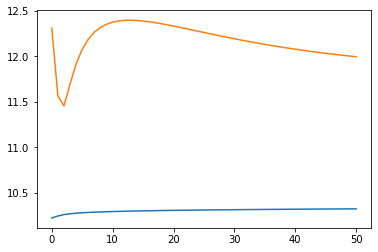

In [20]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

err_tr = []
err_te = []
for lambd in range(0, 51):
    ridge = Ridge(alpha=lambd, fit_intercept=False)
    ridge.fit(PolynomialFeatures(10).fit_transform(X_train), y_train)
    h_train = ridge.predict(PolynomialFeatures(10).fit_transform(X_train))
    h_test = ridge.predict(PolynomialFeatures(10).fit_transform(X_test))
    err_tr.append(log(mean_squared_error(y_train, h_train)))
    err_te.append(log(mean_squared_error(y_test, h_test)))

plt.plot(range(0,51),err_tr)
plt.plot(range(0,51),err_te)

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

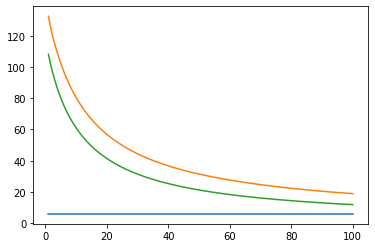

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)
L0_arr = []
L1_arr = []
L2_arr = []
for lambd in range(1, 101):
    ridge = Ridge(alpha=lambd, fit_intercept=False)
    ridge.fit(PolynomialFeatures(5).fit_transform(X_train), y_train)
    L0 = nonzeroes(ridge.coef_)
    L1 = 0
    L2 = 0
    for w in ridge.coef_:
        L1 += abs(w)
        L2 += w * w
    L2 = sqrt(L2)
    L0_arr.append(L0)
    L1_arr.append(L1)
    L2_arr.append(L2)

plt.plot(range(1,101),L0_arr)
plt.plot(range(1,101),L1_arr)
plt.plot(range(1,101),L2_arr)

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

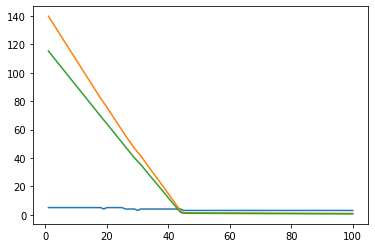

In [23]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L0_arr = []
L1_arr = []
L2_arr = []
for lambd in range(1, 101):
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(PolynomialFeatures(5).fit_transform(X_train), y_train)
    L0 = nonzeroes(lasso.coef_)
    L1 = 0
    L2 = 0
    for w in lasso.coef_:
        L1 += abs(w)
        L2 += w * w
    L2 = sqrt(L2)
    L0_arr.append(L0)
    L1_arr.append(L1)
    L2_arr.append(L2)

plt.plot(range(1,101),L0_arr)
plt.plot(range(1,101),L1_arr)
plt.plot(range(1,101),L2_arr)

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

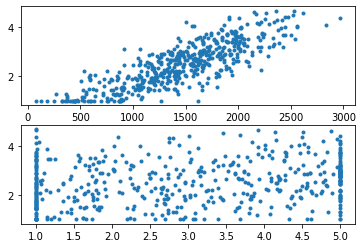

In [25]:
# Vaš kôd ovdje
plt.subplot(2,1,1)
plt.plot(exam_score, grades_y, ".")
plt.subplot(2,1,2)
plt.plot(grade_in_highschool, grades_y, ".")

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [26]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01, fit_intercept=False)
ridge.fit(grades_X, grades_y)
print(ridge.coef_)

[0.00147711 0.1106004 ]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1,1))
ridge = Ridge(alpha=0.01, fit_intercept=False)
ridge.fit(grades_X_fixed, grades_y_fixed)
print(ridge.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [28]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:,1], axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [29]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01, fit_intercept=False)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print(ridge.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [30]:
import random
# Vaš kôd ovdje
for lambd in [0.01, 1000]:
    print("lambda = ", lambd)
    ridge = Ridge(alpha=lambd, fit_intercept=False)
    coefs0 = []
    coefs1 = []
    coefs2 = []
    for i in range(0, 10):
        grades_Xy = np.hstack((grades_X_fixed_colinear, grades_y_fixed))
        chosen_examples = np.vstack(random.sample(list(grades_Xy), int(0.5*len(grades_Xy))))
        chosen_y = chosen_examples[:, [3]]
        chosen_X = chosen_examples[:, :3]
        ridge.fit(chosen_X, chosen_y)
        print("w: ", ridge.coef_)
        coefs0.append(ridge.coef_[0][0])
        coefs1.append(ridge.coef_[0][1])
        coefs2.append(ridge.coef_[0][2])
    print("standardne devijacije: ", np.std(coefs0), np.std(coefs1), np.std(coefs2), "\n")

lambda =  0.01
w:  [[0.78301723 0.06677615 0.06677615]]
w:  [[0.77544689 0.06320157 0.06320157]]
w:  [[0.85089181 0.09025319 0.09025319]]
w:  [[0.79814116 0.06261167 0.06261167]]
w:  [[0.80026047 0.07197637 0.07197637]]
w:  [[0.83359033 0.07412351 0.07412351]]
w:  [[0.80668816 0.07355294 0.07355294]]
w:  [[0.79724423 0.06488742 0.06488742]]
w:  [[0.7845818  0.08345461 0.08345461]]
w:  [[0.83971386 0.07567311 0.07567311]]
standardne devijacije:  0.02448721456406599 0.00850877312737404 0.008508773127179925 

lambda =  1000
w:  [[0.17541775 0.03152494 0.03152494]]
w:  [[0.15195326 0.04737394 0.04737394]]
w:  [[0.17605382 0.03495808 0.03495808]]
w:  [[0.15735766 0.03158091 0.03158091]]
w:  [[0.16869334 0.03850873 0.03850873]]
w:  [[0.17559253 0.02702189 0.02702189]]
w:  [[0.16428743 0.03641583 0.03641583]]
w:  [[0.17139512 0.0329677  0.0329677 ]]
w:  [[0.16576717 0.03934881 0.03934881]]
w:  [[0.14715235 0.03441341 0.03441341]]
standardne devijacije:  0.009717854236725025 0.0052587279546254

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.